# Tirgul 8: Dementia Prediction with Tree-based Models

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error as mse

# Read Data
[A link for more details about the data](https://www.kaggle.com/majedahalrwaily/dementia-classification)

In [46]:
data = pd.read_csv('oasis_cross-sectional.csv')

data.head()

,ID,M/F,Hand,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay
0,OAS1_0001_MR1,F,R,74,2.0,3.0,29.0,0.0,1344,0.743,1.306,NaN
1,OAS1_0002_MR1,F,R,55,4.0,1.0,29.0,0.0,1147,0.810,1.531,NaN
2,OAS1_0003_MR1,F,R,73,4.0,3.0,27.0,0.5,1454,0.708,1.207,NaN
3,OAS1_0004_MR1,M,R,28,NaN,NaN,NaN,NaN,1588,0.803,1.105,NaN
4,OAS1_0005_MR1,M,R,18,NaN,NaN,NaN,NaN,1737,0.848,1.010,NaN


## Wrok Flow:
- Feature selection
- Filter data
- Determine prediction label
- Label categorization
- Train/Test split

In [47]:
features = ['M','R','Age','Educ','SES','MMSE','eTIV','nWBV','ASF']
pred_label = ['CDR']
# get dummies translates values to columns
fm_df = pd.get_dummies(data['M/F'])
hands_df = pd.get_dummies(data['Hand'])

hands_df

,R
0,1
1,1
2,1
3,1
4,1
...,...
431,1
432,1
433,1
434,1


In [48]:
# Join the data
data = pd.concat([data,fm_df],axis=1)
data = pd.concat([data,hands_df],axis=1)

data = data[features + pred_label].dropna()
data.head()

,M,R,Age,Educ,SES,MMSE,eTIV,nWBV,ASF,CDR
0,0,1,74,2.0,3.0,29.0,1344,0.743,1.306,0.0
1,0,1,55,4.0,1.0,29.0,1147,0.810,1.531,0.0
2,0,1,73,4.0,3.0,27.0,1454,0.708,1.207,0.5
8,1,1,74,5.0,2.0,30.0,1636,0.689,1.073,0.0
9,0,1,52,3.0,2.0,30.0,1321,0.827,1.329,0.0


| Column      | Description |
|:----------- |:----------- |
| EDUC      | Years of Education       |
| SES       | Socioeconomic Status       |
| MMSE      | Mini Mental State Examination    |
| CDR       |  Clinical Dementia Rating      |
| eTIV      | Estimated Total Intracranial Volume     |
| ASF       | Normalize Whole Brain Volume      |

# Turning values into categories
We turn the values into categories and representing them as integers because they maintain an order, other wise we will use _one hot encodeing_. 

In [49]:
data['CDR'] = data['CDR'].astype('category').cat.codes
# 0 => 0 , 0.5 => 1 , 1 => 2 , 2 => 3
data.head()

,M,R,Age,Educ,SES,MMSE,eTIV,nWBV,ASF,CDR
0,0,1,74,2.0,3.0,29.0,1344,0.743,1.306,0
1,0,1,55,4.0,1.0,29.0,1147,0.810,1.531,0
2,0,1,73,4.0,3.0,27.0,1454,0.708,1.207,1
8,1,1,74,5.0,2.0,30.0,1636,0.689,1.073,0
9,0,1,52,3.0,2.0,30.0,1321,0.827,1.329,0


# Train/Test split

In [50]:
X = data[features]
y = data[pred_label]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=43)  

X.head()

,M,R,Age,Educ,SES,MMSE,eTIV,nWBV,ASF
0,0,1,74,2.0,3.0,29.0,1344,0.743,1.306
1,0,1,55,4.0,1.0,29.0,1147,0.810,1.531
2,0,1,73,4.0,3.0,27.0,1454,0.708,1.207
8,1,1,74,5.0,2.0,30.0,1636,0.689,1.073
9,0,1,52,3.0,2.0,30.0,1321,0.827,1.329


# Evaluation function

In [51]:
print("score:>{:.3f}<".format(34.532324344))

score:>34.532<


In [52]:
def eval(x,y,model):
    pred = model.predict(x)
    y_alt=y.values
    print("Acc: {:.3f}/100".format(100*(pred == y_alt).mean()))
    print("MSE: {:.3f}".format(mse(pred,y,squared=False)))   # note for CDR cat units
    print("Classified {:.3f}% as sick, where the in the true data {:.3f}% where sick.".format(100*(pred>0).sum()/len(pred), 100*(y.values>0).sum()/len(y.values)) )  


# Tree plotting funtion
More about plot_tree method: [plot_tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html)


In [53]:
import sklearn.tree as tree
def plot_tree(tree_model,feat,size=(15,10)):
    fig = plt.figure(figsize=size)
    tree.plot_tree(tree_model, 
                   feature_names = feat, 
                   filled=True, 
                   rounded = True) 

# Training

## Vanil tree

In [74]:
print((y_test==0).sum()/len(y_test))
print((y_test==1).sum()/len(y_test))
print((y_test==2).sum()/len(y_test))
print((y_test==3).sum()/len(y_test))

(53+40+6)/3

CDR    0.522727
dtype: float64
CDR    0.409091
dtype: float64
CDR    0.068182
dtype: float64
CDR    0.0
dtype: float64


33.0

In [76]:
model = DecisionTreeClassifier(random_state=42)

model.fit(X_train,y_train)
print("Depth:",model.get_depth())
eval(X_test,y_test,model)

Depth: 10
Acc: 40.393/100
MSE: 0.674
Classified 50.000% as sick, where the in the true data 47.727% where sick.


## Max-depth = 4

Acc: 43.233/100
MSE: 0.544
Classified 38.636% as sick, where the in the true data 47.727% where sick.


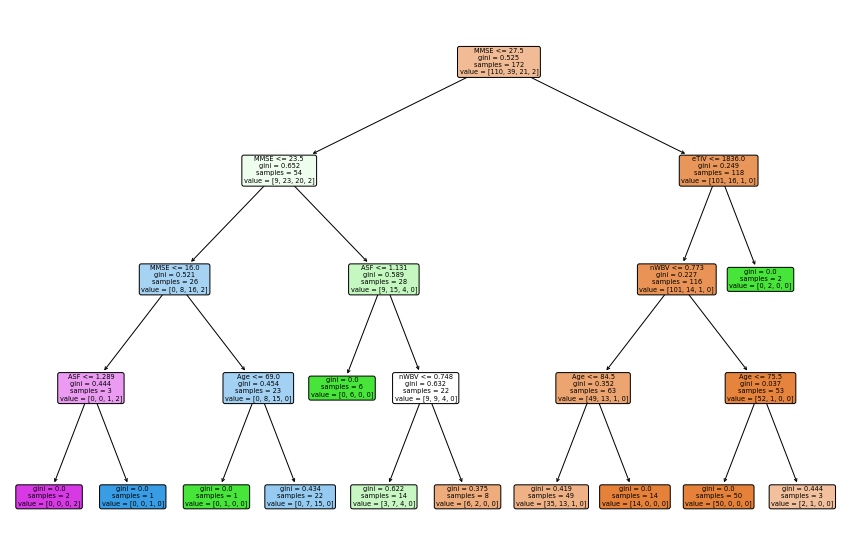

In [75]:
model = DecisionTreeClassifier(max_depth=4,random_state=42)

model.fit(X_train,y_train)

eval(X_test,y_test,model)
plot_tree(model,features)

## Max-depth = 1

In [80]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=12444)
# 12444 more sick in test
# 8999  more sick in train

print("People sick (Train):\t{:.2f}%".format(100*(y_train.values>0).mean()))  
print("People sick (Test):\t{:.2f}%".format(100*(y_test.values>0).mean()))  

People sick (Train):	35.47%
People sick (Test):	50.00%


Acc: 45.351/100
MSE: 0.603
Classified 34.091% as sick, where the in the true data 50.000% where sick.


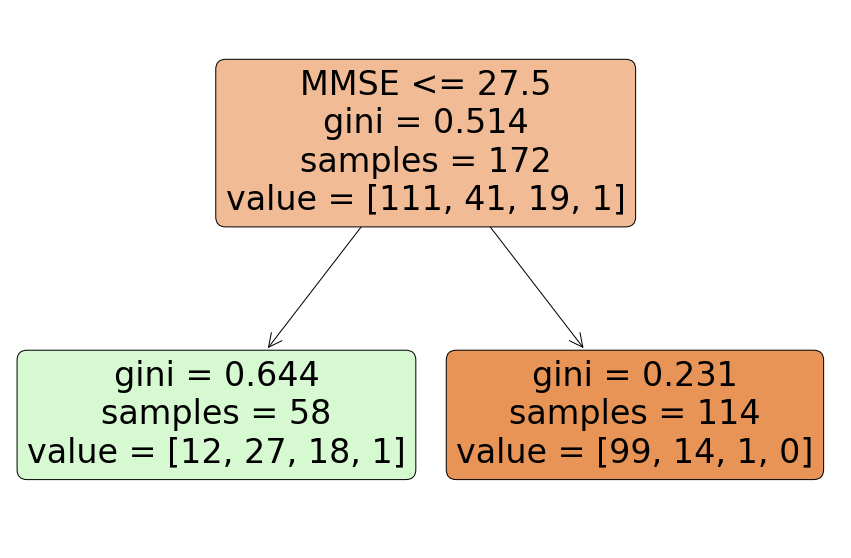

In [81]:
model = DecisionTreeClassifier(max_depth=1,random_state=42)

model.fit(X_train,y_train)
eval(X_test,y_test,model)
plot_tree(model,features)

The value refers the CDR column of values [0,0.5,1,2] where 0 means healthy.
The results seems to be better according to the evaluation function, but if we look at the leaves, we see that most of the subjects are not sick so 'Not Sick' is the safest geuss.

![smbc.png](smbc.png)

## Min samples leaf = 5

Acc: 42.459/100
MSE: 0.477
Classified 38.636% as sick, where the in the true data 50.000% where sick.


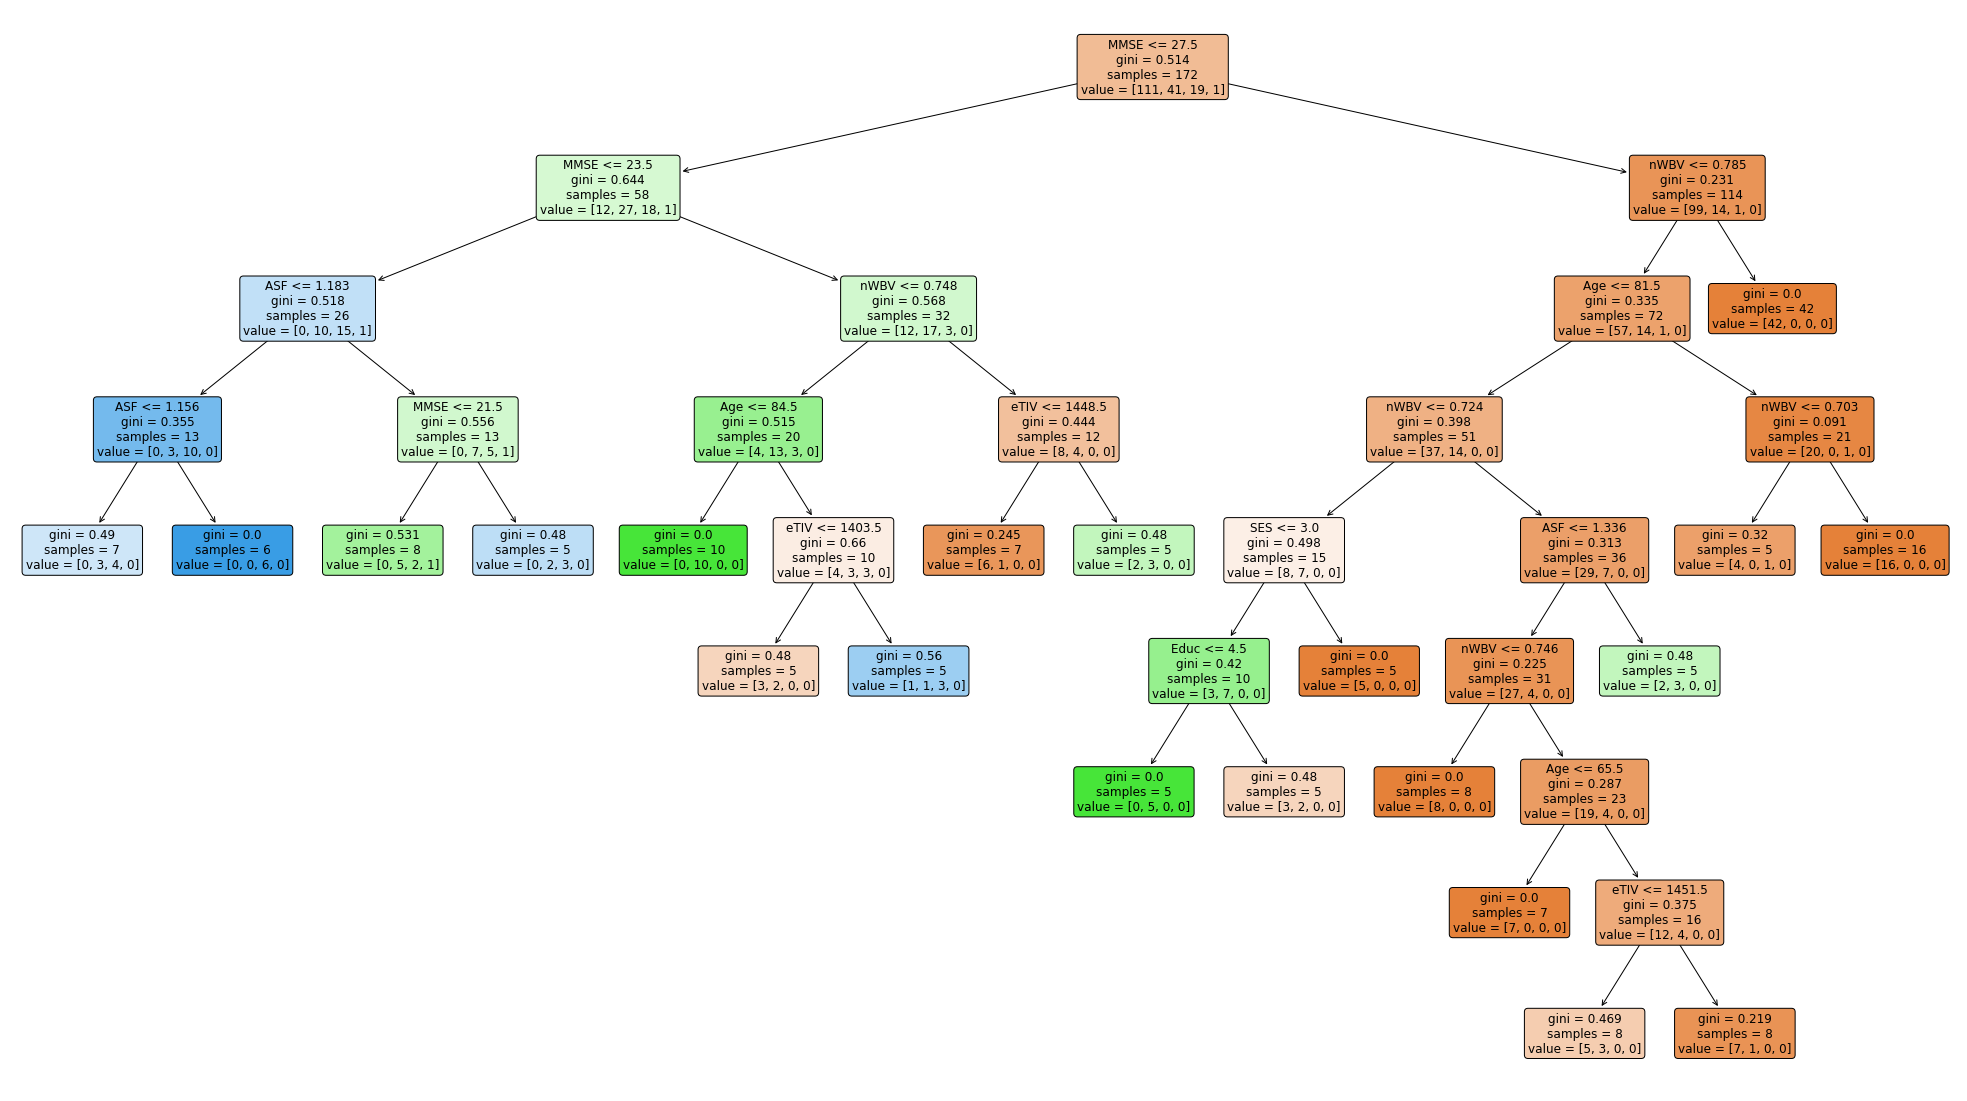

In [82]:
model = DecisionTreeClassifier(min_samples_leaf=5,random_state=42)

model.fit(X_train,y_train)

eval(X_test,y_test,model)

plot_tree(model,features,(35,20))

## Min samples split = 5

Acc: 43.750/100
MSE: 0.622
Classified 40.909% as sick, where the in the true data 47.727% where sick.


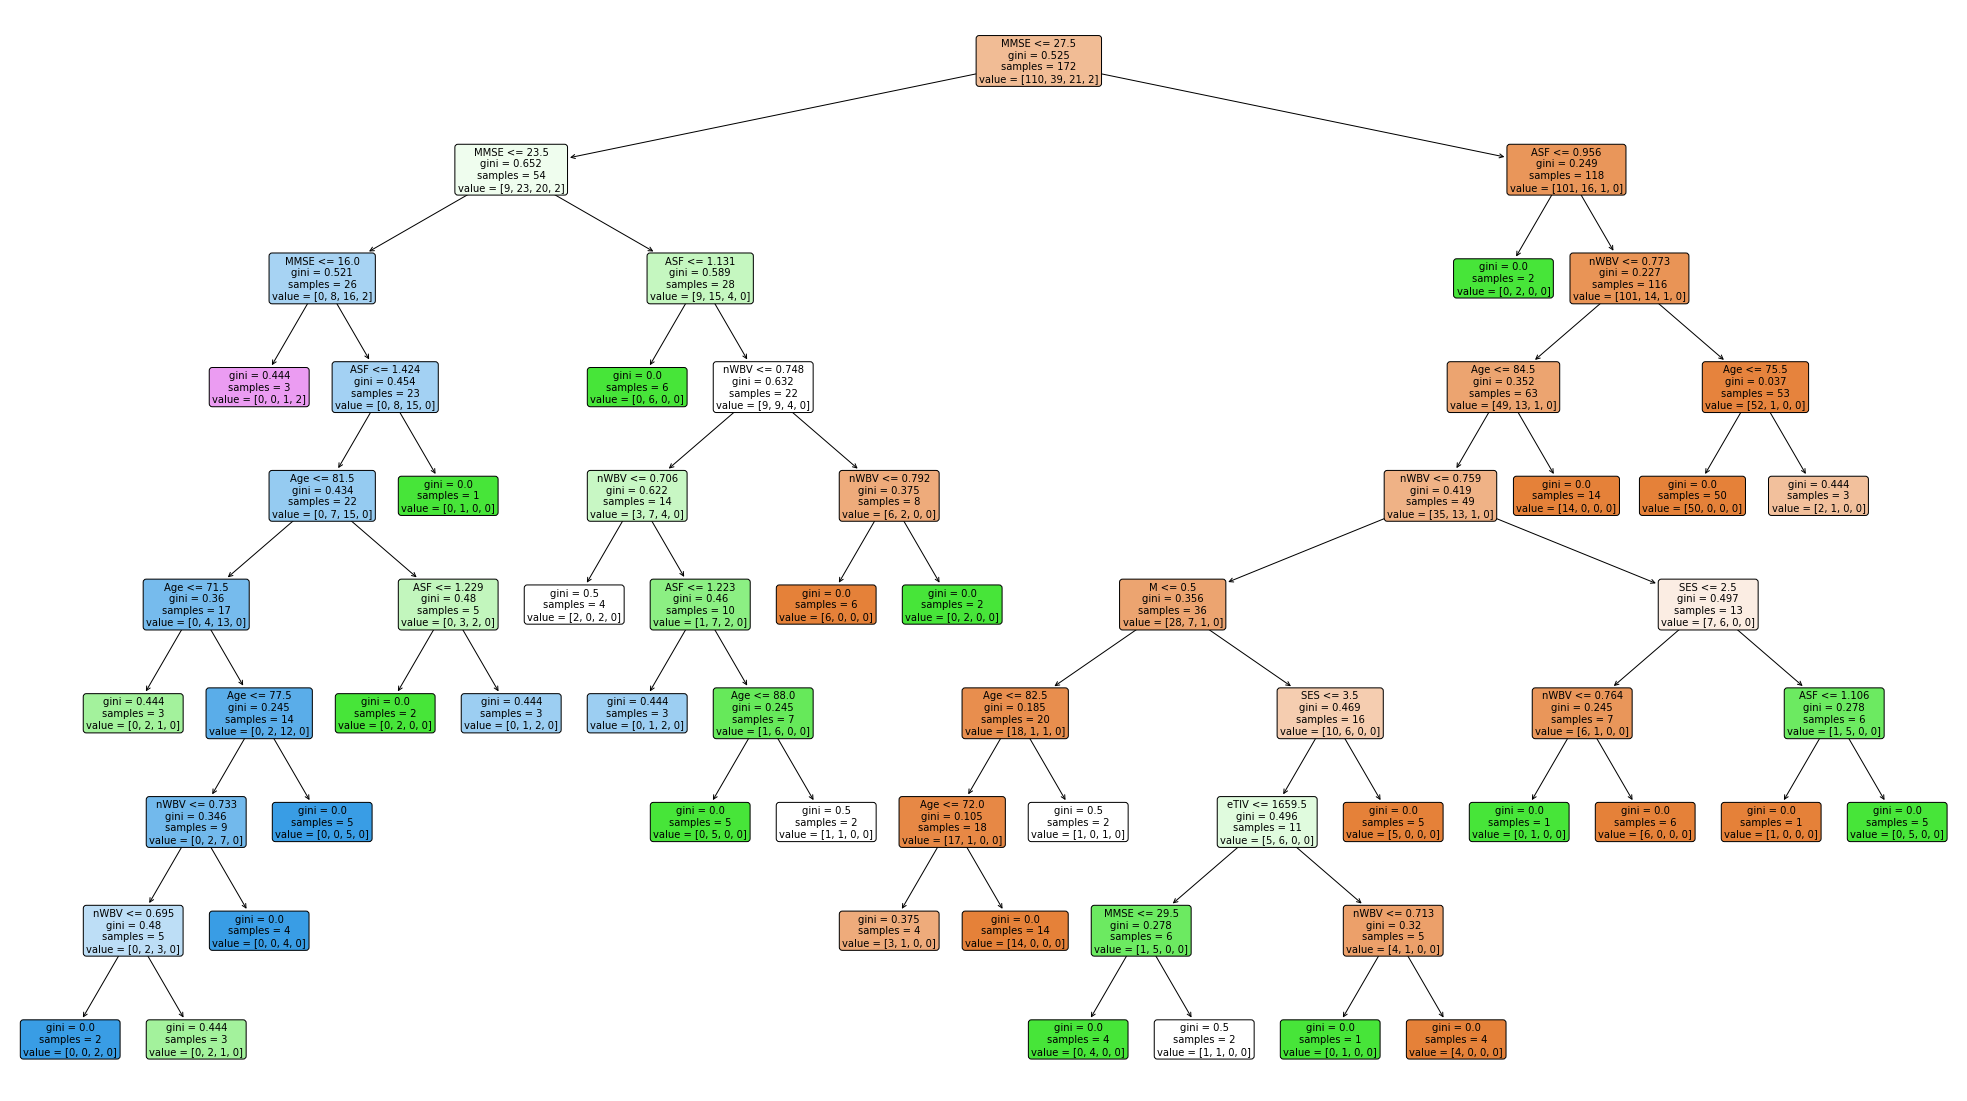

In [23]:
model = DecisionTreeClassifier(min_samples_split=5,random_state=42)

model.fit(X_train,y_train)

eval(X_test,y_test,model)

plot_tree(model,features,(35,20))